In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from uts import *
%matplotlib inline

In [13]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    x = data[:,:2]
    y = data[:,2]
    return x, y

x_train,y_train=load_data("ex2data2.txt")

In [14]:
print("X_train:", x_train[:5])
print("Type of x_train:",type(x_train))
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of x_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [15]:
print ('The shape of x_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of x_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


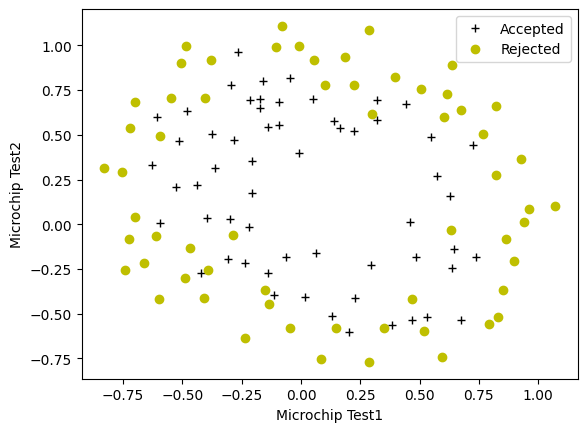

In [17]:
def plot_data(x, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    plt.plot(x[positive, 0], x[positive, 1], 'k+', label=pos_label)
    plt.plot(x[negative, 0], x[negative, 1], 'yo', label=neg_label)
plot_data(x_train,y_train[:],pos_label="Accepted",neg_label="Rejected")
plt.ylabel("Microchip Test2")
plt.xlabel("Microchip Test1")
plt.legend(loc="upper right")
plt.show()

In [22]:
print("Original shape:",x_train.shape)
def map_feature(x1,x2):
    x1=np.atleast_1d(x1)
    x2=np.atleast_1d(x2)
    degree=6
    out=[]
    for i in range(1,degree+1):
        for j in range(i + 1):
            out.append((x1**(i-j) * (x2**j)))
    return np.stack(out, axis=1)  
mapped_x=map_feature(x_train[:,0],x_train[:,1])
print("Shape after mapping :",mapped_x.shape)

Original shape: (118, 2)
Shape after mapping : (118, 27)


In [25]:
print("x_train[0]:",x_train[0])
print("mapped_xtrain:",mapped_x[0])

x_train[0]: [0.051267 0.69956 ]
mapped_xtrain: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [26]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [30]:
def compute_cost(x,y,w,b,lambda_=1):
    m,n=x.shape
    cost=0.
    for i in range(m):
         f_wb_i=sigmoid(np.dot(x[i],w)+b)
         cost+=(-y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i))
    cost=cost/m
    reg_cost=0
    for j in range(n):
        reg_cost+=(w[j]**2)
    reg_cost=(lambda_/(2*m))*reg_cost
    total_cost=cost+reg_cost
    return total_cost

In [32]:
def gradient_reg(x,y,w,b,lambda_=1):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0.
    for i in range(m):
        err=sigmoid(np.dot(x[i],w)+b)-y[i]
        dj_db+=err
        for j in range(n):
            dj_dw[j]+=err*x[i,j]
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    for j in range(n):
        dj_dw[j]+=(lambda_/m)*w[j]
    return dj_db,dj_dw

In [42]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters,lambda_):
    m = len(x)
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_reg(x, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:     
            cost =  cost_function(x, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history

In [43]:
x_mapped = map_feature(x_train[:, 0], x_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(x_mapped.shape[1]) - 0.5 
initial_b = 0.5
lambda_ = 0.5
dj_db, dj_dw = gradient_reg(x_mapped, y_train, initial_w, initial_b, lambda_)
print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )   

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.0031402782673134655]


In [49]:
def predict(x,w,b):
    m, n = x.shape   
    p = np.zeros(m)
    for i in range(m):   
        f_wb=sigmoid(np.dot(x[i],w)+b)
        p[i]=f_wb>=0.5
    return p

In [50]:
np.random.seed(1)
initial_w = np.random.rand(x_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01    
iterations = 10000
alpha = 0.01
w,b, J_history,_ = gradient_descent(x_mapped, y_train, initial_w, initial_b, 
                                    compute_cost, gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


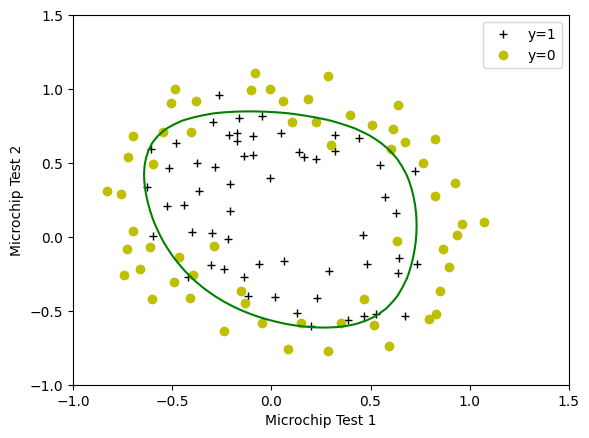

In [52]:
def plot_decision_boundary(w, b, x, y): 
    plot_data(x[:, 0:2], y)
    if x.shape[1] <= 2:
        plot_x = np.array([min(x[:, 0]), max(x[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        plt.plot(plot_x, plot_y, c="b")
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        z = z.T
        plt.contour(u,v,z, levels = [0.5], colors="g")
plot_decision_boundary(w, b, x_mapped, y_train)
plt.ylabel('Microchip Test 2') 
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

In [55]:
p = predict(x_mapped, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
